# Pytotrch 정리

## 파이토치
- 페이스북이 초기 루아 언어로 개발된 토치를 파이썬 버전으로 개발하여 2917년도에 공개하였다.
- 초기에 토치는 넘파이 라이브러리처럼 과학 연산을 위한 라이브러리로 공개되었다.
- 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시켰다.
- 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공한다.

## 파이토치 모듈 구조
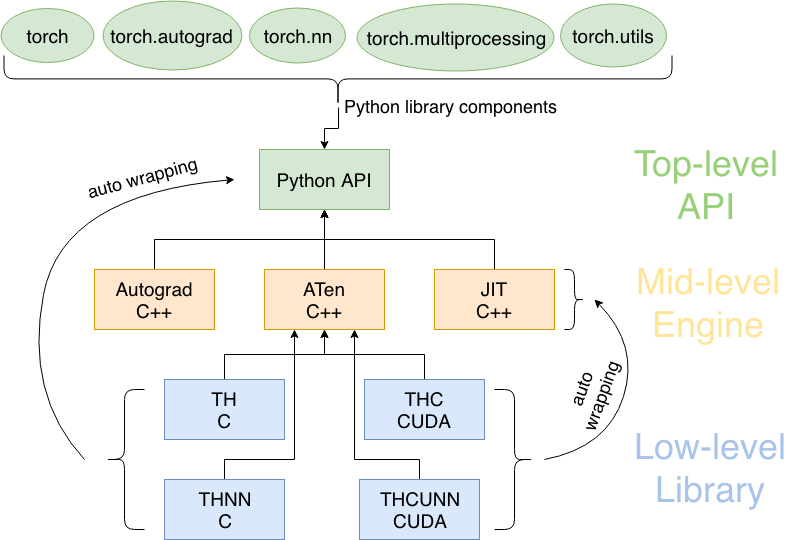

## 파이토치의 구성 요소
- torch : 매안 네임스페이스, 텐서 등의 다양한 수학 함수가 포함되어있다.
- torch.autograd : 자동 미분 기능을 제공하는 라이브러리이다.
- torch.nn : 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- touch.multiproce3ssing : 병렬처리 기능을 제공하는 라이브러리
- torch.optim : SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- torch.utils : 데이터 조작 등 유틸리티 기능 제공
- torch.onnx : ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용한다.

## 텐서 (Tensors)
- 데이터 표현을 위한 기본 구조로 텐서를 사용한다.
- 텐서는 데이터를 담기 위한 컨테이너로서 일반적으로 수치형 데이터를 저장한다.
- 넘파이의 ndarray와 유사하다.
- GPU를 사용한 연산 가속이 가능하다.

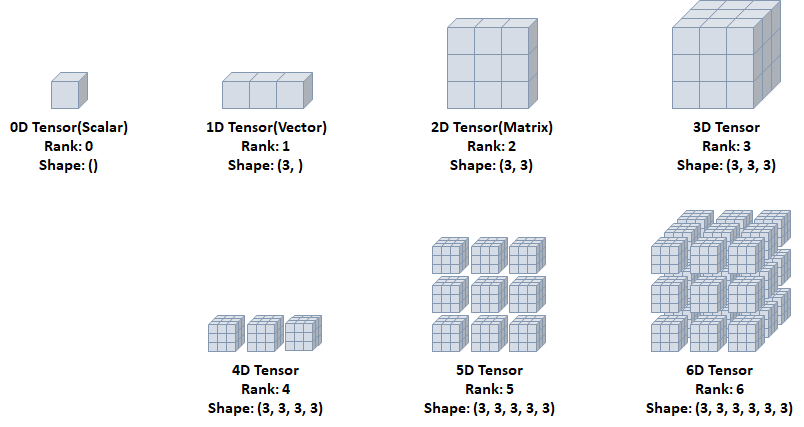



In [4]:
import torch
torch.__version__

'2.6.0+cu124'

## 텐서 초기화와 데이터 타입

### 초기화 되지 않은 텐서

In [5]:
x = torch.empty(4, 2)
print(x)

tensor([[ 7.4618e-37,  0.0000e+00],
        [-1.0417e-07,  4.5576e-41],
        [ 1.4013e-45,  1.2612e-44],
        [ 0.0000e+00,  0.0000e+00]])


### 무작위로 초기화된 텐서

In [6]:
x = torch.rand(4, 2)
print(x)

tensor([[0.9002, 0.5827],
        [0.3921, 0.9878],
        [0.1057, 0.8237],
        [0.1705, 0.0943]])


### 데이터 타입(dtype)이 long이고, 0으로 채워진 텐서

In [7]:
x = torch.zeros(4, 2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


### 사용자가 입력한 값으로 텐서 초기화

In [8]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


### 2 x 4 크기, double 타입, 1로 채워진 텐서

In [9]:
x = x.new_ones(2, 4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


### x와 같은 크기, float 타입, 무작위로 채워진 텐서

In [10]:
x = torch.randn_like(x, dtype=torch.float)
print(x)


tensor([[-0.7328,  0.1329,  1.2402,  0.2019],
        [-0.0353,  1.0649, -0.9229, -0.5017]])


### 텐서의 크기 계산

In [11]:
print(x.size())

torch.Size([2, 4])


## 데이터 타입 (Data Type)

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |

In [12]:
ft = torch.FloatTensor([1, 2, 3])

print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [13]:
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [14]:
it = torch.IntTensor([1, 2, 3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [15]:
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


## Cuda Tensors
- .to 메소드를 사용하여 텐서를 어떠한 장치 (cpu, gpu)로도 옮길 수 있다.

In [16]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.3823])
-0.38228389620780945
torch.float32


In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

y = torch.ones_like(x, device=device)

print(y)

x = x.to(device)

print(x)

z = x + y

print(z)

print(z.to('cpu', torch.double))

cpu
tensor([1.])
tensor([-0.3823])
tensor([0.6177])
tensor([0.6177], dtype=torch.float64)


## 다차원 텐서 표현

### 0D Tensor (Scalar)
- 하나의 숫자를 담고 있는 텐서 (tensor)
- 축과 형상이 없다.

In [18]:
t0 = torch.tensor(0)

print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


### 1D Tensor (Vector)
- 값들을 저장한 리스트와 유사한 텐서
- 하나의 축이 존재한다.

In [19]:
t1 = torch.tensor([1, 2, 3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


### 2D Tensor (Matrix)
- 행렬과 같은 모양으로 두 개의 축이 존재한다.
- 일반적인 수치, 통계 데이터셋이 해당한다.
- 주로 샘플(Sample)과 특성(Features)를 가진 구조로 사용된다.

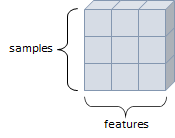

In [20]:
t2 = torch.tensor([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


### 3D Tensor
- 큐브와 같은 모양으로 세 개의 축이 존재한다.
- 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당한다.
- 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재한다.
- 주로 샘플 (Sample), 타임스탭(Timestep), 특성 (Features)을 가진 구조로 사용한다.
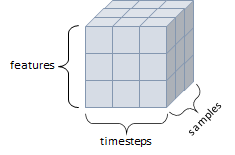

In [25]:
t3 = torch.tensor([[[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]],
                  [[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]],
                  [[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]]])

print(t3.ndim)
print(t3.shape)
print(t3)


3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


### 4D Tensor
- 4개의 축
- 컬러 이미지 데이터가 대표적인 사례 (흑백 이미지 데이터는 3D Tensor로 가능하다.)
- 주로 샘플, 높이, 너비, 컬러 채널을 가진 구조로 사용된다.

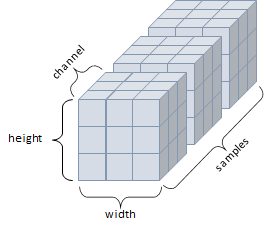

### 5D Tensor
- 5개의 축
- 비디오 데이터가 대표적인 사례이다.
- 주로 샘플, 프레임, 높이, 너비, 컬러 채널을 가진 구조로 사용된다.

## 텐서의 연산 (Operations)
- 텐서에 대한 수학 연산, 삼각 함수, 비트 연산, 비교 연산, 집계 등 제공

In [27]:
import math

a = torch.rand(1, 2) * 2 - 1
print(a)
print(torch.abs(a))

print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

tensor([[-0.5012, -0.2477]])
tensor([[0.5012, 0.2477]])
tensor([[-0., -0.]])
tensor([[-1., -1.]])
tensor([[-0.5000, -0.2477]])


In [28]:
print(a)
print(torch.min(a))

print(torch.max(a))

print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1, 2, 3, 1, 2, 2])))

tensor([[-0.5012, -0.2477]])
tensor(-0.5012)
tensor(-0.2477)
tensor(-0.3745)
tensor(0.1792)
tensor(0.1242)
tensor([1, 2, 3])


- max와 min은 dim 인자를 줄 경우 argmax와 argmin도 함께 리턴한다.
  - argmax : 최대 값을 가진 인덱스
  - argmin : 최소 값을 가진 인덱스

In [29]:
x = torch.rand(2, 2)

print(x)
print(x.max(dim=0))
print(x.max(dim=1))

tensor([[0.4011, 0.7357],
        [0.8679, 0.0902]])
torch.return_types.max(
values=tensor([0.8679, 0.7357]),
indices=tensor([1, 0]))
torch.return_types.max(
values=tensor([0.7357, 0.8679]),
indices=tensor([1, 0]))


In [30]:
 print(x)
 print(x.min(dim=0))
 print(x.min(dim=1))

tensor([[0.4011, 0.7357],
        [0.8679, 0.0902]])
torch.return_types.min(
values=tensor([0.4011, 0.0902]),
indices=tensor([0, 1]))
torch.return_types.min(
values=tensor([0.4011, 0.0902]),
indices=tensor([0, 1]))


In [31]:
x = torch.rand(2, 2)
print(x)

y = torch.rand(2, 2)

print(y)

tensor([[0.2613, 0.3218],
        [0.8868, 0.7944]])
tensor([[0.6943, 0.5128],
        [0.1442, 0.5247]])


- torch.add : 덧셈

In [32]:
print(x + y)
print(torch.add(x, y))

tensor([[0.9557, 0.8346],
        [1.0309, 1.3190]])
tensor([[0.9557, 0.8346],
        [1.0309, 1.3190]])


### 결과 텐서를 인자로 사용

In [33]:
result = torch.empty(2, 4)
torch.add(x, y, out=result)
print(result)

tensor([[0.9557, 0.8346],
        [1.0309, 1.3190]])


<ipython-input-33-8c3c98e3bad2>:2: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /pytorch/aten/src/ATen/native/Resize.cpp:30.)
  torch.add(x, y, out=result)


- in-place 방식
  - in-place 방식으로 텐서의 값을 변경하는 연산 뒤에는 _"가 붙는다.
  - x.copy_(y), x.t_()

In [34]:
print(x)
print(y)
y.add_(x)
print(y)

tensor([[0.2613, 0.3218],
        [0.8868, 0.7944]])
tensor([[0.6943, 0.5128],
        [0.1442, 0.5247]])
tensor([[0.9557, 0.8346],
        [1.0309, 1.3190]])


- torch.sub : 뺄셈

In [35]:
print(x)
print(y)

print(x - y)

print(torch.sub(x, y))

print(x.sub(y))

tensor([[0.2613, 0.3218],
        [0.8868, 0.7944]])
tensor([[0.9557, 0.8346],
        [1.0309, 1.3190]])
tensor([[-0.6943, -0.5128],
        [-0.1442, -0.5247]])
tensor([[-0.6943, -0.5128],
        [-0.1442, -0.5247]])
tensor([[-0.6943, -0.5128],
        [-0.1442, -0.5247]])


- torch.mul : 곱셈

In [36]:
print(x)
print(y)
print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

tensor([[0.2613, 0.3218],
        [0.8868, 0.7944]])
tensor([[0.9557, 0.8346],
        [1.0309, 1.3190]])
tensor([[0.2497, 0.2686],
        [0.9142, 1.0478]])
tensor([[0.2497, 0.2686],
        [0.9142, 1.0478]])
tensor([[0.2497, 0.2686],
        [0.9142, 1.0478]])


torch.div : 나눗셈

In [37]:
print(x)
print(y)
print(x / y)
print(torch.div(x, y))
print(x.div(y))

tensor([[0.2613, 0.3218],
        [0.8868, 0.7944]])
tensor([[0.9557, 0.8346],
        [1.0309, 1.3190]])
tensor([[0.2735, 0.3856],
        [0.8602, 0.6022]])
tensor([[0.2735, 0.3856],
        [0.8602, 0.6022]])
tensor([[0.2735, 0.3856],
        [0.8602, 0.6022]])


- torch.mm : 내적 (dot product)

In [39]:
print(x)
print(y)
print(torch.matmul(x, y))
z = torch.mm(x, y)
print(z)
print(torch.svd(z))

tensor([[0.2613, 0.3218],
        [0.8868, 0.7944]])
tensor([[0.9557, 0.8346],
        [1.0309, 1.3190]])
tensor([[0.5815, 0.6426],
        [1.6664, 1.7879]])
tensor([[0.5815, 0.6426],
        [1.6664, 1.7879]])
torch.return_types.svd(
U=tensor([[-0.3342, -0.9425],
        [-0.9425,  0.3342]]),
S=tensor([2.5932, 0.0120]),
V=tensor([[-0.6806,  0.7327],
        [-0.7327, -0.6806]]))


## 텐서의 조작 (Manipulations)
- 인덱싱 (Indexing) : Numpy처럼 인덱싱 형태로 사용 가능

In [42]:
x = torch.Tensor([[1, 2],
                  [3, 4]])

print(x)
print(x[0, 0])
print(x[0, 1])
print(x[1, 0])
print(x[1, 1])

print(x[:0])
print(x[:, 1])

print(x[0, :])
print(x[1, :])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([], size=(0, 2))
tensor([2., 4.])
tensor([1., 2.])
tensor([3., 4.])


- view : 텐서의 크기 (size)나 모양(shape)를 변경
  - 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지 되어야 한다.
  - -1로 설정되면 계산을 통해 해당 크기의 값을 유추

In [45]:
x = torch.rand(4, 5)
print(x)
y = x.view(20)
print(y)

z = x.view(5, -1)

print(z)

tensor([[0.1689, 0.8559, 0.5321, 0.3159, 0.9068],
        [0.4558, 0.2534, 0.1916, 0.2086, 0.3513],
        [0.3586, 0.3564, 0.8013, 0.4291, 0.9001],
        [0.8243, 0.1108, 0.1097, 0.4577, 0.2402]])
tensor([0.1689, 0.8559, 0.5321, 0.3159, 0.9068, 0.4558, 0.2534, 0.1916, 0.2086,
        0.3513, 0.3586, 0.3564, 0.8013, 0.4291, 0.9001, 0.8243, 0.1108, 0.1097,
        0.4577, 0.2402])
tensor([[0.1689, 0.8559, 0.5321, 0.3159],
        [0.9068, 0.4558, 0.2534, 0.1916],
        [0.2086, 0.3513, 0.3586, 0.3564],
        [0.8013, 0.4291, 0.9001, 0.8243],
        [0.1108, 0.1097, 0.4577, 0.2402]])


- item : 텐서에 값이 단 하나라도 존재하면, 숫자 갑을 얻을 수 있다.

In [46]:
x = torch.randn(1)

print(x)
print(x.item())
print(x.dtype)

tensor([-1.1798])
-1.1798174381256104
torch.float32


- 스칼라 값이 하나만 존재해야 item()를 사용할 수 잇다.

- squeeze : 차원을 축소(제거)

In [48]:
tensor = torch.rand(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[0.5324, 0.1330, 0.7545],
         [0.3527, 0.4808, 0.4801],
         [0.0288, 0.6848, 0.6318]]])
torch.Size([1, 3, 3])


In [49]:
t = tensor.squeeze()

print(t)

print(t.shape)

tensor([[0.5324, 0.1330, 0.7545],
        [0.3527, 0.4808, 0.4801],
        [0.0288, 0.6848, 0.6318]])
torch.Size([3, 3])


- unsqueeze : 차원을 증가 (생성)

In [50]:
t = torch.rand(3, 3)

print(t)
print(t.shape)

tensor([[0.8234, 0.8434, 0.0485],
        [0.9560, 0.8950, 0.2903],
        [0.5856, 0.3536, 0.7983]])
torch.Size([3, 3])


In [52]:
tensor = t.unsqueeze(dim = 0)

print(tensor)
print(tensor.shape)

tensor([[[0.8234, 0.8434, 0.0485],
         [0.9560, 0.8950, 0.2903],
         [0.5856, 0.3536, 0.7983]]])
torch.Size([1, 3, 3])


In [53]:
tensor = t.unsqueeze(dim = 2)

print(tensor)
print(tensor.shape)

tensor([[[0.8234],
         [0.8434],
         [0.0485]],

        [[0.9560],
         [0.8950],
         [0.2903]],

        [[0.5856],
         [0.3536],
         [0.7983]]])
torch.Size([3, 3, 1])


- stack : 텐서간 결합

In [55]:
x = torch.FloatTensor([1, 4])
print(x)

y = torch.FloatTensor([2, 5])
print(y)

z = torch.FloatTensor([3, 6])

print(z)

print(torch.stack([x, y, z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


- cat : 텐서를 결합하는 메소드 (concatenate)
  - 넘파이의 stack과 유사하지만, 쌓을 dim이 존재해야 한다.
  - 해당 차원을 늘려준 후 결합한다.

In [56]:
a = torch.randn(1, 3, 3)
print(a)
b = torch.randn(1, 3, 3)
print(b)

c = torch.cat((a, b), dim=0)

print(c)
print(c.size())

tensor([[[-0.8154,  0.9497,  0.0052],
         [ 0.8561,  0.9801, -1.6498],
         [-0.3017, -1.6251,  0.7053]]])
tensor([[[ 1.0512, -0.1658,  0.1306],
         [-0.2753,  1.0571, -0.1417],
         [ 1.0446, -0.5080,  1.5907]]])
tensor([[[-0.8154,  0.9497,  0.0052],
         [ 0.8561,  0.9801, -1.6498],
         [-0.3017, -1.6251,  0.7053]],

        [[ 1.0512, -0.1658,  0.1306],
         [-0.2753,  1.0571, -0.1417],
         [ 1.0446, -0.5080,  1.5907]]])
torch.Size([2, 3, 3])


In [57]:
c = torch.cat((a, b), dim=1)

print(c)
print(c.size())

tensor([[[-0.8154,  0.9497,  0.0052],
         [ 0.8561,  0.9801, -1.6498],
         [-0.3017, -1.6251,  0.7053],
         [ 1.0512, -0.1658,  0.1306],
         [-0.2753,  1.0571, -0.1417],
         [ 1.0446, -0.5080,  1.5907]]])
torch.Size([1, 6, 3])


In [58]:
c = torch.cat((a, b), dim=2)

print(c)
print(c.size())

tensor([[[-0.8154,  0.9497,  0.0052,  1.0512, -0.1658,  0.1306],
         [ 0.8561,  0.9801, -1.6498, -0.2753,  1.0571, -0.1417],
         [-0.3017, -1.6251,  0.7053,  1.0446, -0.5080,  1.5907]]])
torch.Size([1, 3, 6])


- chuck : 텐서를 여러 개로 나눌 때 사용한다. (몇 개로 나눌 것인가?)

In [61]:
tensor = torch.rand(3, 6)
print(tensor)

t1, t2, t3 = torch.chunk(tensor, 3, dim = 1)

print(t1)
print(t2)
print(t3)

tensor([[0.5153, 0.5493, 0.5587, 0.0444, 0.1928, 0.2966],
        [0.4272, 0.9525, 0.0213, 0.9032, 0.7063, 0.9814],
        [0.1951, 0.8604, 0.5616, 0.0622, 0.2956, 0.0761]])
tensor([[0.5153, 0.5493],
        [0.4272, 0.9525],
        [0.1951, 0.8604]])
tensor([[0.5587, 0.0444],
        [0.0213, 0.9032],
        [0.5616, 0.0622]])
tensor([[0.1928, 0.2966],
        [0.7063, 0.9814],
        [0.2956, 0.0761]])


- split : chunck와 동일한 기능이지만, 조금 다르다. (텐서의 크기는 몇인가?)

In [62]:
tensor = torch.rand(3, 6)

t1, t2 = torch.split(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)

tensor([[0.2143, 0.2954, 0.4407, 0.0944, 0.1954, 0.0499],
        [0.5971, 0.0958, 0.4451, 0.0864, 0.5870, 0.6261],
        [0.2031, 0.0668, 0.4619, 0.3521, 0.1651, 0.5647]])
tensor([[0.2143, 0.2954, 0.4407],
        [0.5971, 0.0958, 0.4451],
        [0.2031, 0.0668, 0.4619]])
tensor([[0.0944, 0.1954, 0.0499],
        [0.0864, 0.5870, 0.6261],
        [0.3521, 0.1651, 0.5647]])


- torch <-> numpy
  - Torch Tensor를 Numpy Array로 변환 가능
    - numpy()
    - from_numpy()
- Tensor가 CPU 상에 있다면, Numpy 배열은 메모리 공간을 공유하므로, 하나가 변하면 다른 하나도 변한다.

In [63]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [64]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [65]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [66]:
import numpy as np

a = np.ones(7)

b = torch.from_numpy(a)

np.add(a, 1, out = a)

print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## 자동 미분 (Autograd)
- torch.autograd 패키지는 Tensor의 모든 연산에 대해 자동 미분을 제공한다.
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻이다.
- backprop를 위해 미분 값을 자동으로 계산한다.

- requires_gred 속성을 True로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작한ㄷ.ㅏ
- 기록을 추적하는 것을 중단하게 하려면, .detach()를 호출하여 연산기록으로부터 분리한다.

In [67]:
a = torch.randn(3, 3)
a = a * 3

print(a)
print(a.requires_grad)

tensor([[ 0.1211,  1.2619, -1.6628],
        [ 0.7766,  1.0845,  1.2867],
        [ 1.9060,  0.7649, -1.6571]])
False


- requires_grad_()는 기존 텐서의 requires_grad 값을 바꿔치기(in-place)하여 변경한다.
  - grad_fn : 미분 값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

In [69]:
a.requires_grad_(True)
print(a.requires_grad)

b = (a * a).sum()
print(b)

print(b.grad_fn)

True
tensor(14.7705, grad_fn=<SumBackward0>)


## 기울기 (Gradient)

In [70]:
x = torch.ones(3, 3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [71]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [73]:
z = y * y
out = z.mean()

print(z, out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


- 계산이 완료된 후, backward()를 호출하면, 자동으로 역전파 계산이 가능하고, .grad 속성에 누적된다.

In [74]:
print(out)
out.backward()

tensor(36., grad_fn=<MeanBackward0>)


- grad : data가 거쳐온 layer에 대한 미분 값 저장

In [75]:
print(x)
print(x.grad)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [76]:
x = torch.randn(3, requires_grad=True)

y = x * 2

while y.data.norm() < 1000:
  y = y * 2

print(y)

tensor([ 561.1743, -376.3896, 1806.0502], grad_fn=<MulBackward0>)


In [77]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


- with torch.no_grad()룰 사용하여 기울기의 업데이트를 하지 않는다.
- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 with torch.no_grad()로 감싸면 기울 계산은 필요 없지만, requires_grad=True로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용하다.

In [78]:
print(x.requires_grad)

print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


- detach() : 내용물은 같지만, require_grad가 다른 새로운 Tensor를 가져올 때

In [79]:
print(x.requires_grad)

y = x.detach()

print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


## 자동 미분 흐름 예제
- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [80]:
a = torch.ones(2, 2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [81]:
a = torch.ones(2, 2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [82]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


### b = a + 2

In [83]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


$c = b^2$

In [84]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [85]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [87]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


### a의 grad_fn이 None인 이유는 직접적으로 계산한 부분이 없었기 때문이다.

In [88]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None


In [89]:
print(b.data)
print(b.grad)
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


<ipython-input-89-7222c1aec66c>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  print(b.grad)


In [90]:
print(c.data)
print(c.grad)
print(c.grad_fn)

tensor([[9., 9.],
        [9., 9.]])
None


<ipython-input-90-f6ca42a4f63f>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  print(c.grad)


In [91]:
print(out.data)
print(out.grad)
print(out.grad_fn)

tensor(36.)
None


<ipython-input-91-85e75c577388>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  print(out.grad)


### 데이터 준비
파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능

- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
  - Text Dataset: https://pytorch.org/text/stable/datasets.html
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [92]:
from torch.utils.data import Dataset, DataLoader

토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행


In [93]:
import torchvision.transforms as transforms
from torchvision import datasets

- DataLoader의 인자로 들어갈 transform을 미리 정의할 수 있고, Compose를 통해 리스트 안에 순서대로 전처리 진행한다.
- ToTensor()를 하는 이유는 torchvision이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환한다.


In [95]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5), std=(1.0,))])

In [99]:
trainset = datasets.MNIST(root='/content/',
                          train=True, download=True,
                          transform=mnist_transform)

testset = datasets.MNIST(root='/content/',
                         train=False, download=True,
                         transform=mnist_transform)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.47MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.26MB/s]


- DataLoader는 데이터 전체를 보관했다가 실제 모델 학습을 할 때, batch_size만큼  데이터를 가져온다.

In [103]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

In [107]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [109]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

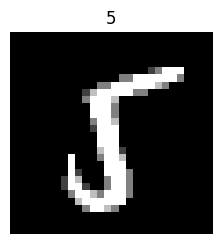

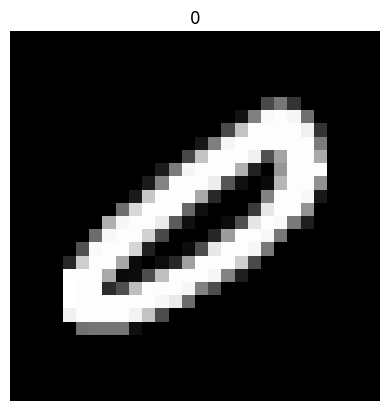

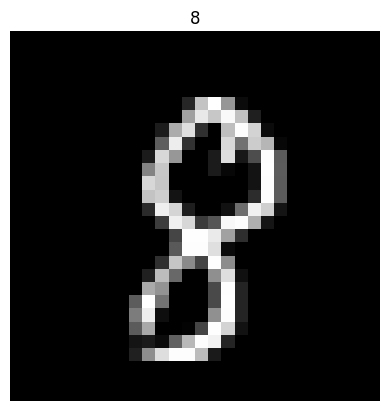

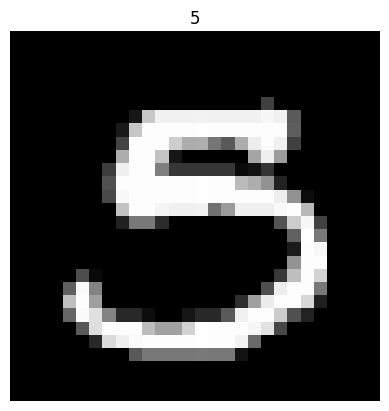

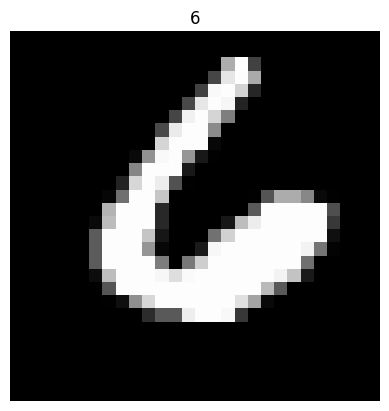

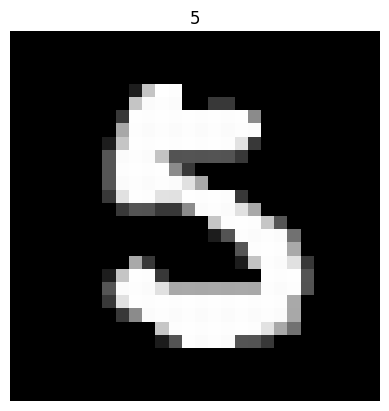

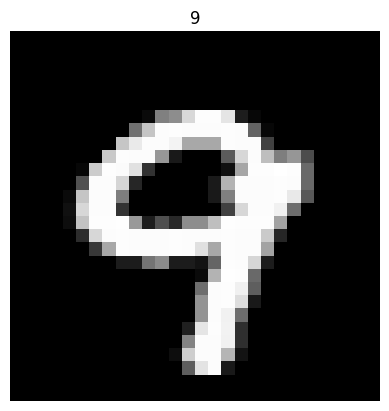

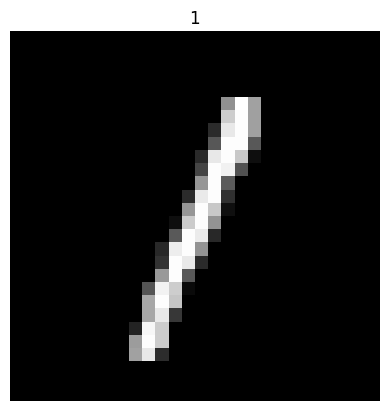

In [114]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12, 6))

cols, rows = 4, 2

for i in range(1, cols * rows + 1):

  sample_idx = torch.randint(len(trainset), size=(1, )).item()
  img, label = trainset[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='gray')

  plt.show()

## 신경망 구성
- 레이어 : 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력 받아 하나 이상의 텐서를 출력한다.
- 모듈 : 한 개 이상의 계층이 모여서 구성된다.
모델 : 한 개 이상의 모듈이 모여서 구성된다.

### `torch.nn` 패키지

주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (`weight`값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html


In [115]:
import torch.nn as nn

- nn.Linear 계층 예제

In [117]:
input = torch.randn(128, 20)
print(input)

m = nn.Linear(20, 30)

print(m)

output = m(input)

print(output)
print(output.size())

tensor([[-0.7011, -0.1410,  0.1208,  ..., -2.4206,  1.7239, -0.7616],
        [-0.9618,  0.9960,  1.0863,  ...,  1.6280, -1.8327, -0.3010],
        [ 0.6995, -0.2522, -1.2578,  ..., -1.0866,  0.9610,  0.5727],
        ...,
        [-0.0072, -0.5594, -0.1967,  ...,  0.0751,  0.4262, -0.0576],
        [ 1.3955, -0.4722,  0.6069,  ..., -0.0606,  1.0897, -0.6775],
        [ 0.3387, -1.0274,  0.6778,  ..., -0.1325,  0.7903, -0.6178]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[-1.1633, -0.8394,  0.2524,  ..., -0.8966, -0.2235, -0.0394],
        [ 0.6177,  0.8341, -0.0122,  ..., -0.3768, -0.1119,  1.0323],
        [-0.7864, -0.0662,  0.4480,  ...,  0.3078,  0.0686,  0.8357],
        ...,
        [ 0.2990, -0.0555,  0.1187,  ..., -0.1502, -0.6034, -0.1998],
        [-0.5909, -1.3527,  0.4878,  ...,  0.6523, -0.0466, -0.6436],
        [-0.1924, -0.6687,  0.3747,  ...,  0.4061,  0.4648, -0.1864]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


- nn.Conv2d 계층 예시

In [118]:
input = torch.randn(20, 16, 50, 100)
print(input.size())

torch.Size([20, 16, 50, 100])


In [119]:
m = nn.Conv2d(16, 33, 3, stride=2)
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))

print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [120]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


## 컨볼루션 레이어
- nn.Conv2d 예제
  - in_channels : channel의 갯수
  - out_channels : 출력 채널의 갯수
  - kernel_size : 커널(필터) 사이즈

In [121]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [123]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- Weight 확인


In [124]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

- weight는 detach()를 통해 꺼내줘야 numpy() 변환이 가능하다.

In [125]:
weight = weight.detach()

In [126]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

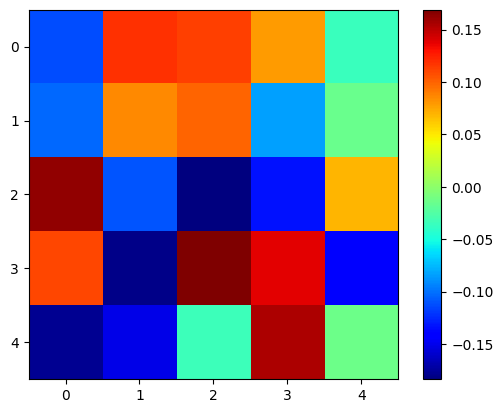

In [127]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [130]:
print(images.shape)
print(images[0].size())

input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [131]:
input_data = torch.unsqueeze(images[0], dim = 0)
print(input_image.size())

output_data = layer(input_data)
output = output_data.data
output_arr = output.numpy()
output_arr.shape


torch.Size([28, 28])


(1, 20, 24, 24)

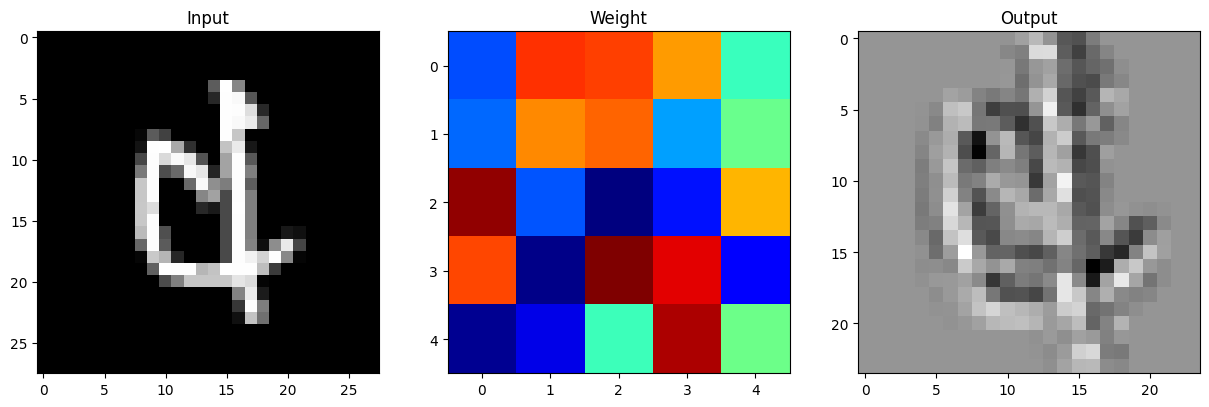

In [134]:
plt.figure(figsize=(15, 30))

plt.subplot(131)
plt.title('Input')
plt.imshow(input_image, 'gray')

plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0, 0, :, :], 'jet')

plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0, 0, :, :], 'gray')

plt.show()

## 폴링 레이어 (Pooling Layer)
- F.max_pool2d
  - stride
  - kernel_size
- torch.nn.MaxPool2d도 많이 사용한다.

In [135]:
import torch.nn.functional as F

pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 Weight가 없기 때문에 바로 numpy() 변환이 가능하다.

In [136]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

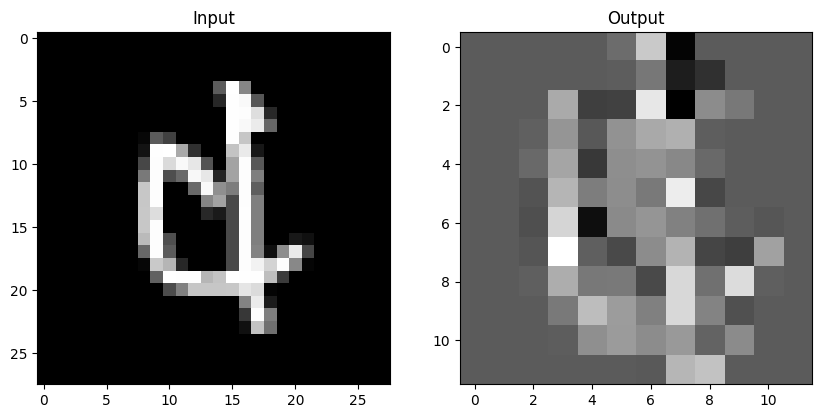

In [137]:
plt.figure(figsize=(10, 15))

plt.subplot(121)
plt.title('Input')
plt.imshow(input_image, 'gray')

plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0, 0, :, :], 'gray')

plt.show()

## 선형 레이어
- 1d만 가능하므로 .view()를 통해 1d로 펼쳐줘야한다.

In [138]:
flatten = input_image.view(1, 28 * 28)
flatten.shape

torch.Size([1, 784])

In [139]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [140]:
lin

tensor([[ 0.1165,  0.2282, -0.0844, -0.3857,  0.1597,  0.1931,  0.4340, -0.1471,
         -0.0336,  0.0576]], grad_fn=<AddmmBackward0>)

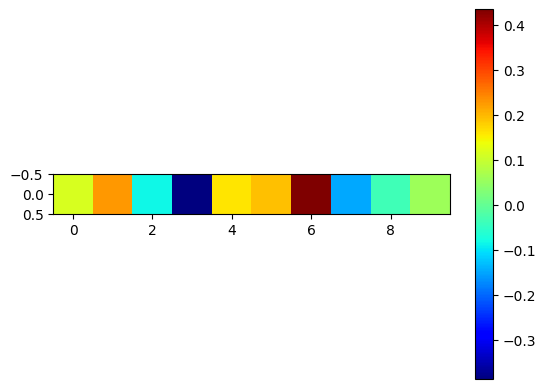

In [143]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

## 비선형 활성화
- F.softmax와 같은 활성화 함수 등

In [148]:
with torch.no_grad():
  flatten = input_image.view(1, 28 * 28)
  lin = nn.Linear(784, 10)(flatten)
  softmax = F.softmax(lin, dim=1)

softmax

tensor([[0.1111, 0.1026, 0.0600, 0.1015, 0.0901, 0.1162, 0.0987, 0.1319, 0.1069,
         0.0811]])

In [149]:
np.sum(softmax.numpy())

np.float32(1.0)

- F.relu
  - ReLu 함수를 적용하는 레이어
  - nn.ReLU로도 사용이 가능하다.

In [150]:
inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [151]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

## 신경망 종류
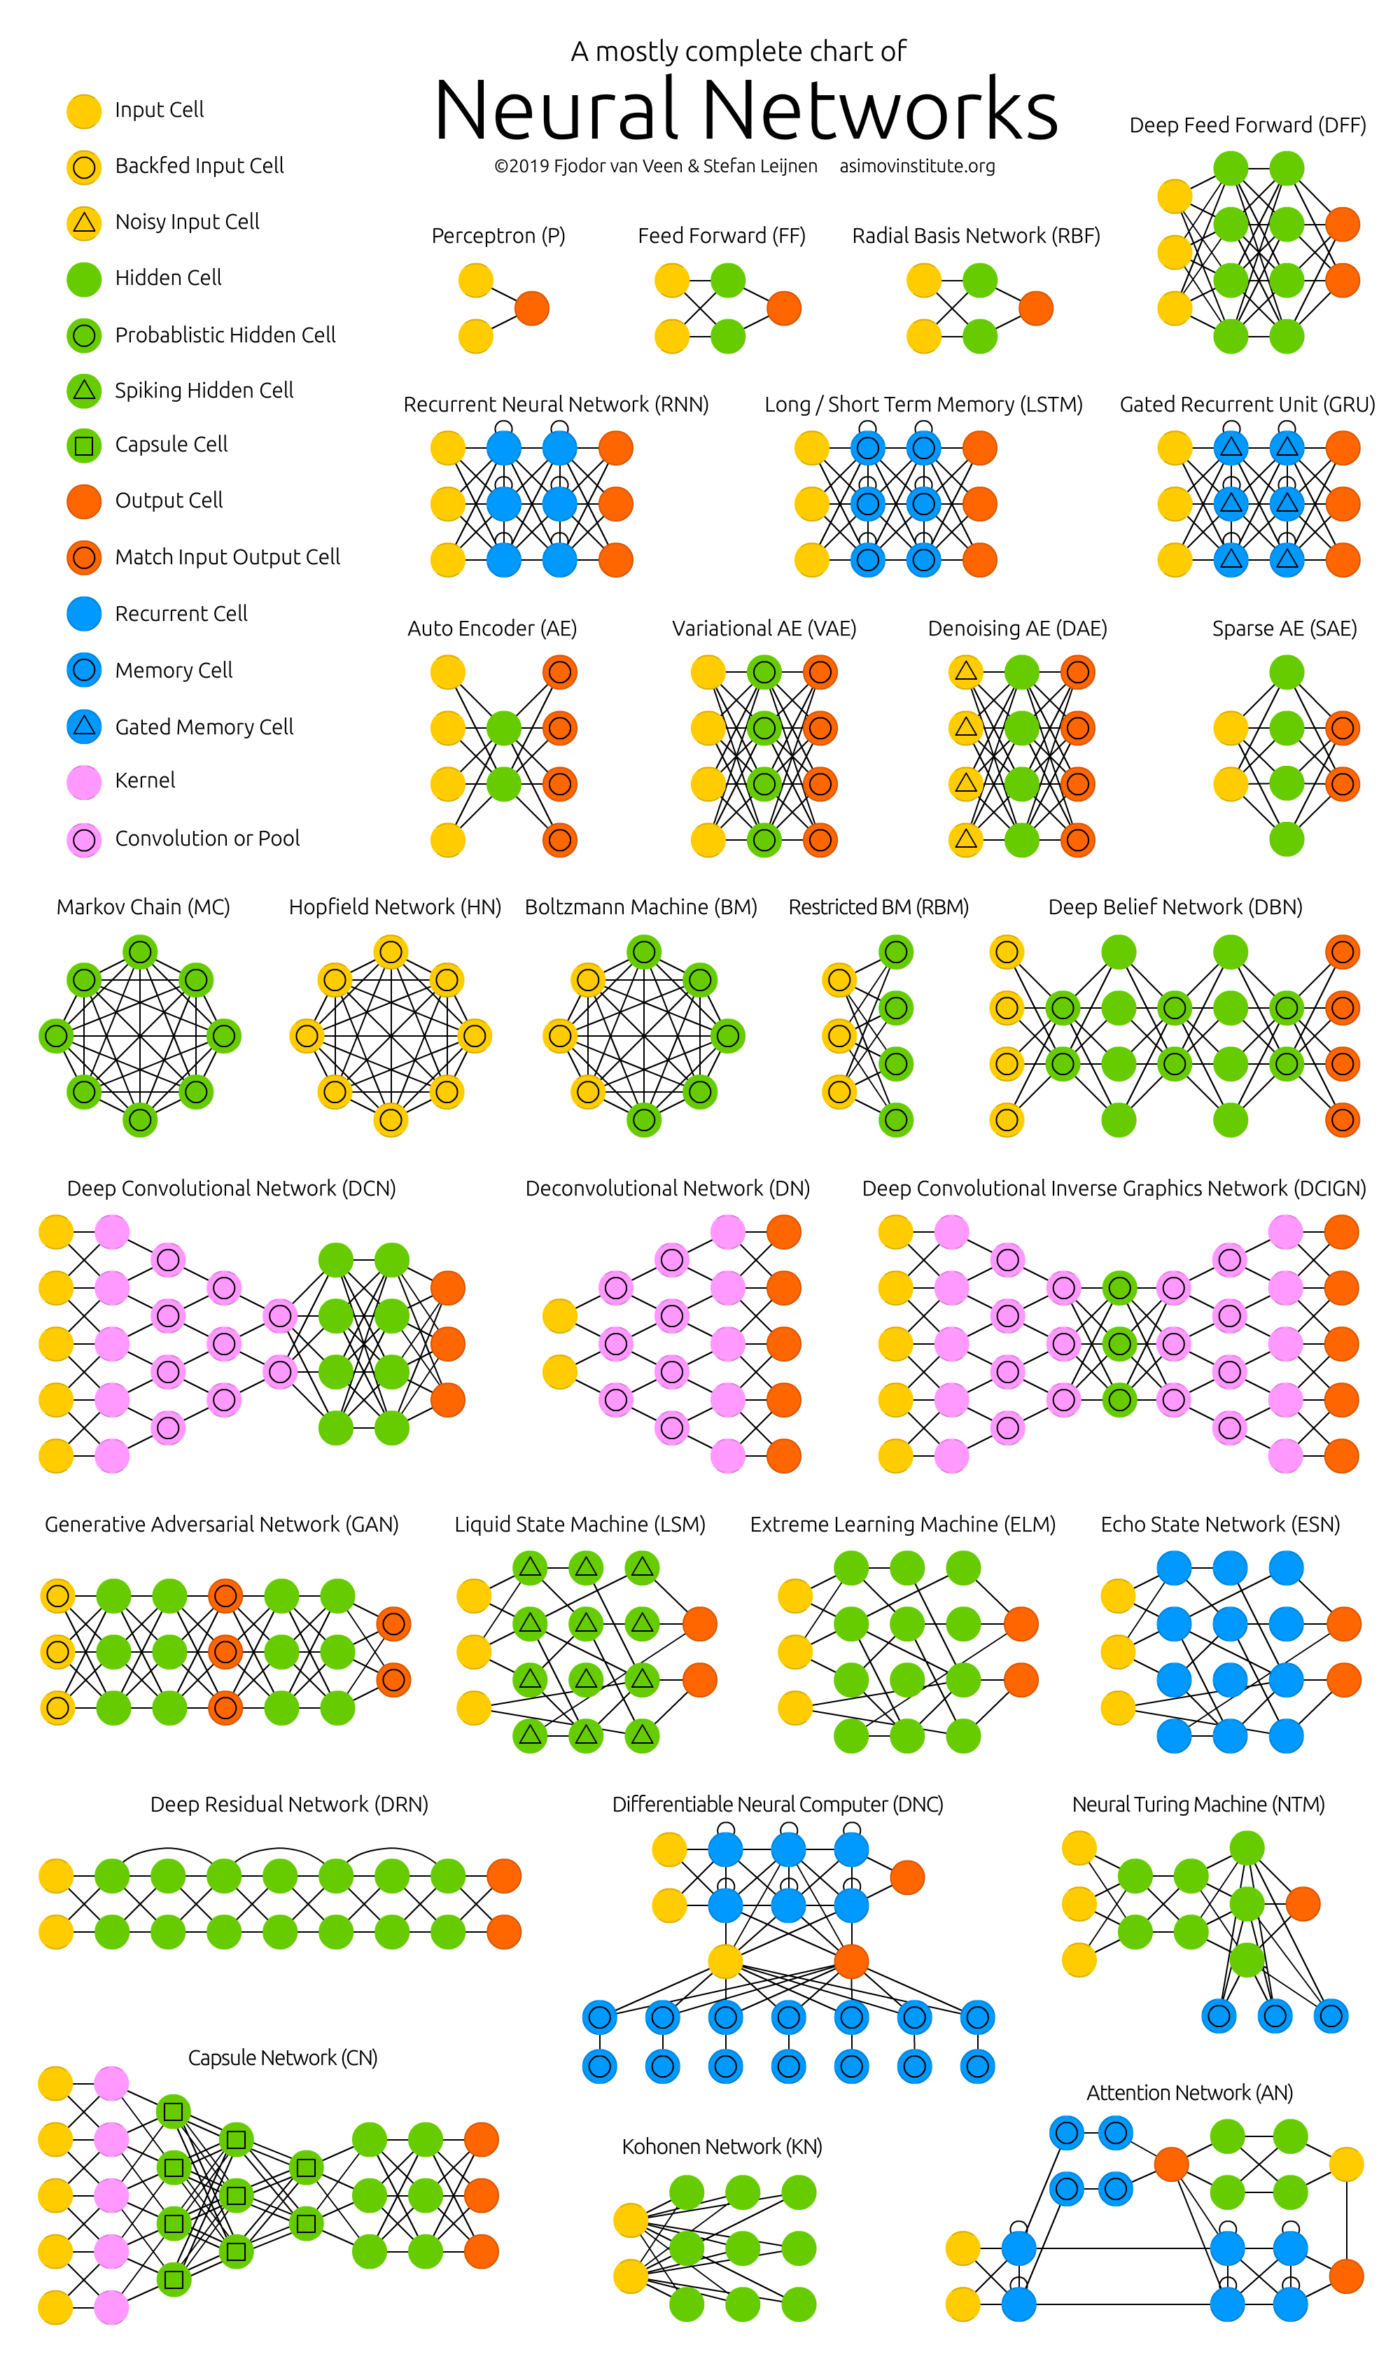